In [1]:
import pandas as pd
import numpy as np

In [2]:
env_df = pd.read_csv('environmental_socioeconomic.csv')
env_df.head()

,co2_emissions,waste_production,gdp,population
0,218.543053,436.276737,39199.932440,6.417631e+07
1,477.821438,399.620887,17380.479824,4.646995e+07
2,379.397274,258.538521,23865.587775,9.648535e+07
3,319.396318,646.540003,36531.225474,2.267887e+07
4,120.208388,528.961744,29283.573781,5.919779e+07


In [3]:
env_df.isna().sum()

co2_emissions       0
waste_production    0
gdp                 0
population          0
dtype: int64

In [6]:
#Selecting the input features
X = env_df[['co2_emissions', 'waste_production']].values
X

array([[218.54305348, 436.27673662],
       [477.82143788, 399.62088661],
       [379.39727382, 258.53852125],
       ...,
       [476.01856177, 373.32862222],
       [228.86959659, 498.98800583],
       [147.71318182, 255.03833292]], shape=(10000, 2))

In [7]:
from sklearn.preprocessing import StandardScaler
#Normalize the features using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(env_df)

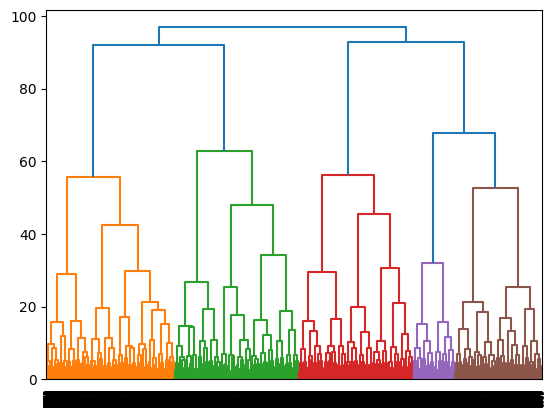

In [9]:
import scipy.cluster.hierarchy as sch
link = sch.linkage(data_scaled, method = 'ward')
dend = sch.dendrogram(link)

In [18]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
labels = model.fit_predict(data_scaled)
labels

array([0, 2, 2, ..., 2, 1, 0], shape=(10000,))

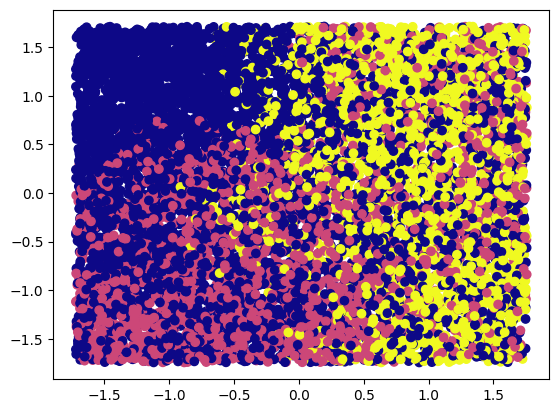

In [19]:
import matplotlib.pyplot as plt
plt.scatter(data_scaled[:,0], data_scaled[:,1], c = model.labels_, cmap ="plasma")
plt.show()